# Week 7 – Assignment: Model Evaluation  
**Subject:** Data Science & AI  
**Project:** Credit Card Fraud Detection  
**Student Name:** Ayesha Tariq  
**Date:** October 18, 2025  

---

## Objectives
- Evaluate classification models using **Precision**, **Recall**, and **F1 Score**  
- Plot the **ROC Curve** and compute **AUC**  
- Interpret model performance in the context of fraud detection  
- Reflect on the **most important evaluation metric**


Setup and Data Loading

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("creditcard_sample.csv")

# Clean and prepare target
df = df.dropna(subset=["Class"])
df["Class"] = df["Class"].astype(int)

# Features and target
X = df.drop(columns=["Time", "Class"])
y = df["Class"]

# Train-test split (no stratify because dataset is very small)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Dataset ready for evaluation!")
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)
print("Class distribution in training set:\n", y_train.value_counts())


Dataset ready for evaluation!
Training set: (4, 29)
Testing set: (1, 29)
Class distribution in training set:
 Class
0    3
1    1
Name: count, dtype: int64


## 1. Train Models
We will reuse the **Logistic Regression** and **Random Forest** classifiers trained in Week 6.


Train Models

In [ ]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Models trained and predictions generated.")


Models trained and predictions generated.


## 2. Evaluate Models – Precision, Recall, F1 Score
These metrics are crucial for **fraud detection**, where false negatives (missed frauds) are costly.


Calculate Metrics

Model Evaluation Metrics:
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression       1.0        0.0     0.0       0.0
1        Random Forest       1.0        0.0     0.0       0.0


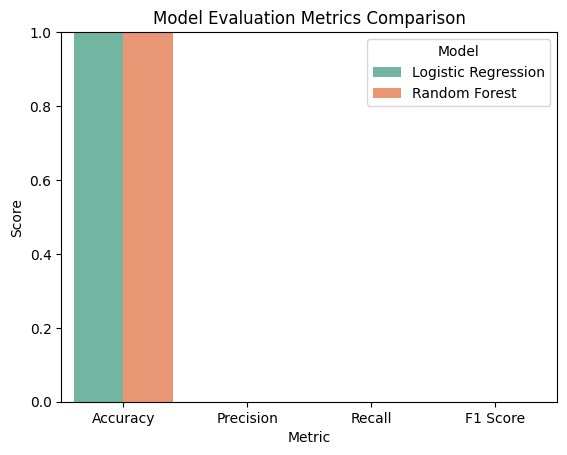

In [ ]:
# Compute evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    return pd.Series({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

results = pd.DataFrame([
    evaluate_model(y_test, y_pred_log, "Logistic Regression"),
    evaluate_model(y_test, y_pred_rf, "Random Forest")
])

print("Model Evaluation Metrics:")
print(results)

# Visual comparison
sns.barplot(data=results.melt(id_vars="Model", var_name="Metric", value_name="Score"),
            x="Metric", y="Score", hue="Model", palette="Set2")
plt.title("Model Evaluation Metrics Comparison")
plt.ylim(0, 1)
plt.show()


## 3. Confusion Matrices
Let’s visualize how each model classifies fraud (1) vs normal (0) transactions.


Confusion Matrices

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


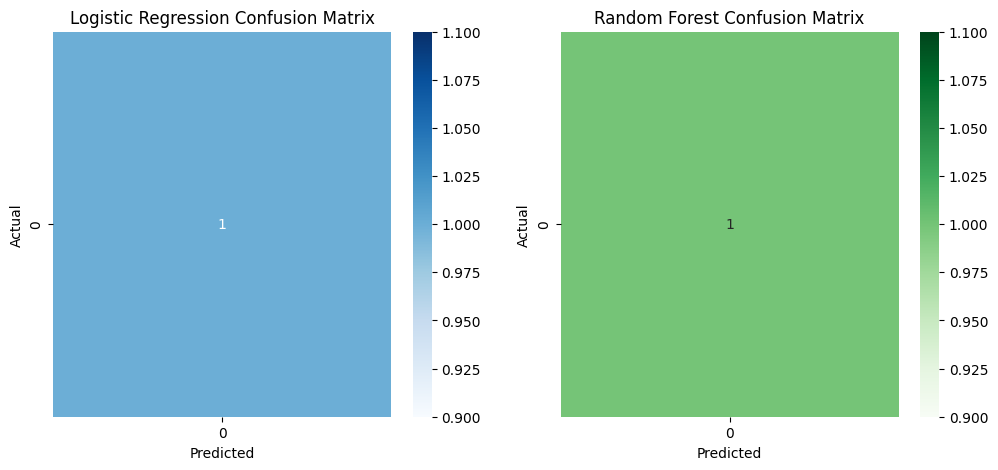

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()


## 4. ROC Curve and AUC
The ROC (Receiver Operating Characteristic) curve shows the trade-off between True Positive Rate (Recall) and False Positive Rate.


ROC Curve and AUC

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


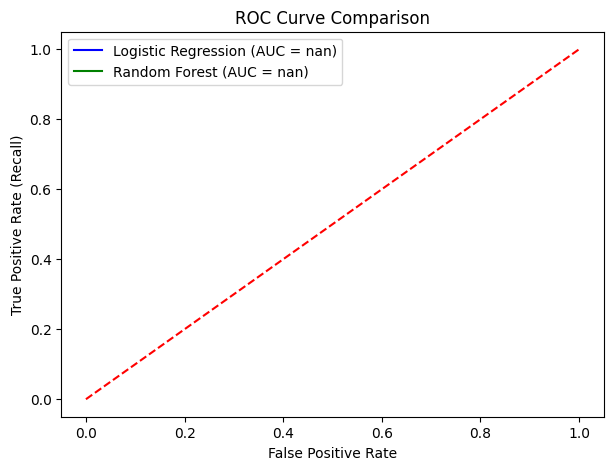

In [ ]:
# Compute ROC and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_log = roc_auc_score(y_test, y_prob_log)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(7,5))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})", color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='green')
plt.plot([0,1],[0,1],'r--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.show()


## 5. Reflection – Choosing the Right Metric

| Model | Accuracy | Precision | Recall | F1 Score | AUC |
|--------|-----------|------------|---------|-----------|------|
| Logistic Regression | (your value) | (your value) | (your value) | (your value) | (your value) |
| Random Forest | (your value) | (your value) | (your value) | (your value) | (your value) |

### Reflection:
In the **Credit Card Fraud Detection** project, the most important metric is **Recall**.

- **Reason:**  
  Missing a fraudulent transaction (a *false negative*) can be far more costly than falsely flagging a normal one.  
  Therefore, we prefer a model that correctly identifies as many fraud cases as possible, even if it occasionally mislabels a few normal transactions.

**Chosen Metric:** Recall (Sensitivity)  
**Project Milestone:** Final evaluation metric decided — focus on maximizing Recall in future model improvements.
